# 設定

In [1]:
import numpy as np
import pandas as pd
import pyper
import matplotlib.pyplot as plt
import time
from IPython.display import display
from contextlib import contextmanager

In [2]:
# 時間計測関数
@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print(f'[{name}] done in {time.time() - t0:.0f} s')

# pyperの使い方

In [11]:
r = pyper.R()
r("a <- 5")
print(r("a"))
# 結果
# try({a})
# [1] 5

r("b <- 10")
print(r("a + b"))
# 結果
# try({a + b})
# [1] 15

try({a})
[1] 5

try({a + b})
[1] 15

15


# packageの活用

In [10]:
r = pyper.R()
print(r("glimpse(iris)"))
# could not find function "glimpse"

try({glimpse(iris)})
Error in glimpse(iris) : 
   関数 "glimpse" を見つけることができませんでした 



In [9]:
r = pyper.R()
r("library(tidyverse)")
print(r("glimpse(iris)"))
# try({glimpse(iris)})

print(r("iris %>% glimpse"))
# try({iris %>% glimpse})

try({glimpse(iris)})
Observations: 150
Variables: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, …
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, …
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, …
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, …
$ Species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa,…

try({iris %>% glimpse})
Observations: 150
Variables: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, …
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, …
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, …
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, …
$ Species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa,…



# pandas, numpy の連携

In [7]:
# random generate
n = 300
x = np.random.poisson(10, n) 
y = np.random.normal(0, 5, n) 
# dataFrame
df = pd.DataFrame({"X":x, "Y":y})
r = pyper.R(use_pandas='True')
r.assign("p_df", df)
print(r("summary(p_df)"))

try({summary(p_df)})
       X               Y           
 Min.   : 2.00   Min.   :-11.7919  
 1st Qu.: 8.00   1st Qu.: -3.8737  
 Median :10.00   Median : -0.2811  
 Mean   : 9.94   Mean   : -0.1942  
 3rd Qu.:12.00   3rd Qu.:  3.5372  
 Max.   :20.00   Max.   : 16.6708  



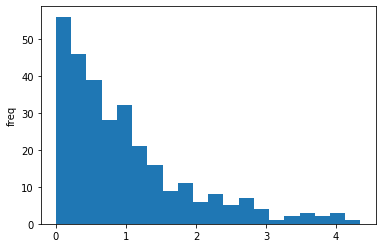

In [53]:
r = pyper.R()
r("rx <- rexp(300,1)")
r("rdf <- data.frame(x = 1:200, y = rnorm(200))")

px = r.get("rx")
pdf = r.get("rdf")
plt.hist(px, bins=20)
plt.ylabel("freq")
plt.show()

In [55]:
print(pdf.columns)
pdf.columns = pdf.columns.str.replace(' ', '')
print(pdf.columns)
Index(['x', 'y'], dtype='object')

Index([' x ', ' y '], dtype='object')
Index(['x', 'y'], dtype='object')


# ユーザ自作関数

In [56]:
r = pyper.R(use_pandas='True')
r("source('~/Desktop/TokyoR/script/function.R', echo=FALSE)")
print(r("shape_data(iris)"))

try({shape_data(iris)})
[1] "データは150行, 5列です!!"



In [67]:
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
r.assign("p_iris", iris)
print(r("shape_data(p_iris)"))

try({shape_data(p_iris)})
[1] "データは150行, 4列です!!"



# 実践1

In [71]:
def view_data(data):
    r = pyper.R(use_pandas='True')
    r("source('~/Desktop/TokyoR/script/function.R', echo=FALSE)")
    r.assign("p_data", data)
    print(r("view_data(p_data)"))

In [72]:
view_data(iris)

try({view_data(p_data)})
[1] "use skim function"
Skim summary statistics  
 n obs: 150    
 n variables: 4    

Variable type: numeric

|     variable      | missing | complete |  n  | mean |  sd  | p0  | p25 | p50  | p75 | p100 |   hist   |
|-------------------|---------|----------|-----|------|------|-----|-----|------|-----|------|----------|
| petal.length..cm. |    0    |   150    | 150 | 3.76 | 1.77 |  1  | 1.6 | 4.35 | 5.1 | 6.9  | ▇▁▁▂▅▅▃▁ |
| petal.width..cm.  |    0    |   150    | 150 | 1.2  | 0.76 | 0.1 | 0.3 | 1.3  | 1.8 | 2.5  | ▇▁▁▅▃▃▂▂ |
| sepal.length..cm. |    0    |   150    | 150 | 5.84 | 0.83 | 4.3 | 5.1 | 5.8  | 6.4 | 7.9  | ▂▇▅▇▆▅▂▂ |
| sepal.width..cm.  |    0    |   150    | 150 | 3.06 | 0.44 |  2  | 2.8 |  3   | 3.3 | 4.4  | ▁▂▅▇▃▂▁▁ |
[1] "use glimpse function"
Observations: 150
Variables: 4
$ sepal.length..cm. <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, …
$ sepal.width..cm.  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, …
$ petal.length

# 実践2

In [3]:
r = pyper.R()
r("source('~/Desktop/TokyoR/script/datasize.R', echo=FALSE)")
r("df1 <- fun(1000)")
r("df2 <- fun(100000)")
r("df3 <- fun(10000000)")

'try({df3 <- fun(10000000)})\n'

In [4]:
# 実行時間
with timer('test'):
    df1 = r.get("df1")
with timer('test'):
    df2 = r.get("df2")
# with timer('test'):
#   df3 = r.get("df3")

[test] done in 0 s
[test] done in 10 s


In [5]:
print(df1.shape)
print(df2.shape)

(1000, 8)
(100000, 8)


In [6]:
# メモリ省略
r("df1_hat <- down_memory(df1)")
r("df2_hat <- down_memory(df2)")
r("df3_hat <- down_memory(df3)")

'try({df3_hat <- down_memory(df3)})\n'

In [8]:
# 実行時間
with timer('test'):
    df1_ = r.get("df1_hat")

[test] done in 119 s


In [103]:
with timer('test'):
    df2_ = r.get("df2_")

{'aaa': array([     1,      2,      3, ...,  99998,  99999, 100000]),
 'bbb': array([110000, 110000, 110000, ..., 110000, 110000, 110000]),
 'ccc': array([1100000, 1100000, 1100000, ..., 1100000, 1100000, 1100000]),
 'ddd': array([0, 0, 0, ..., 0, 0, 0]),
 'eee': array([-245508.34350546,   58936.64351115,  -59155.94769084, ...,
         -10442.52338502,   55147.82477954,  -94523.43059283]),
 'fff': array([3.20028906233791e-37, 9.70561686217147e+70, 71709463980.0396, ...,
        0.0170045202706672, 1.98960128491305e-73, 6.46230526717732e+37],
       dtype=object),
 'ggg': array(['Rl6jfGCDTj', 'AepsZ0ixhy', 'bd1DNwoqlv', ..., 'Y6X44FqhJ5',
        'ghRAvpA3hO', 'TjcSB7UPxn'], dtype='<U10'),
 'hhh': array(['2018-03-07', '2018-03-08', '2018-03-09', ..., '2291-12-18',
        '2291-12-19', '2291-12-20'], dtype='<U10')}

In [ ]:
with timer('test'):
    df3_ = r.get("df3_")

In [9]:
df1_
# print(df2_.shape)